# Basic Time Series
## Timestamps
pandas represents an instant in time using the pandas.Timestamp class. For example:

In [12]:
import pandas as pd

# create a timestamp
pd.Timestamp(year=2023, month=10, day=18, hour=13, minute=2, second=27)

Timestamp('2023-10-18 13:02:27')

When we store multiple Timestamps in a `pd.Series` (for example when we have a column of dates) the data type of the column is set to `datetime64[ns]`:

In [13]:
# Notice the dtype of the column is datetime64
pd.Series([pd.Timestamp(2020,10,18), 
           pd.Timestamp(2020,10,17),
           pd.Timestamp(2020,10,16)])

0   2020-10-18
1   2020-10-17
2   2020-10-16
dtype: datetime64[ns]

### Data
- Hourly precipitation data in Boulder, CO from 2000 to 2014
- September 2013: some of the most intese precipitation ever recorded
- Goal: visualize precipitation data int 2013 and identify the weather event

About the Data:
- NOAA collected data

<AxesSubplot:>

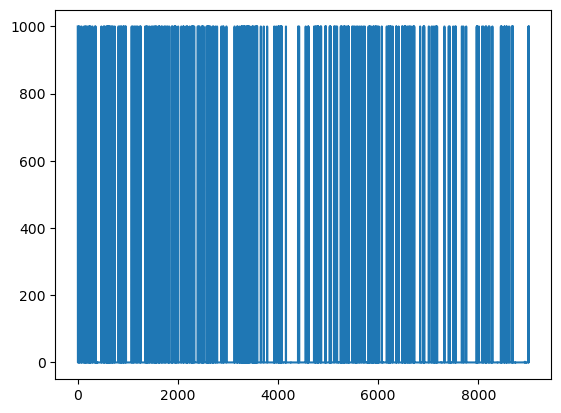

In [14]:
precip = pd.read_csv('https://www.ncei.noaa.gov/orders/cdo/3488381.csv')

#plot the data
precip.HPCP.plot()

NOTE: The documentation shows that the NA Values are stored as 999.99, which is affecting the distribution
NOTE: x-axis values = index of the dataframe and not relative to time
NOTE: We only want precipitation data from september 2013

Lets fix these issues

In [15]:
precip = pd.read_csv('https://www.ncei.noaa.gov/orders/cdo/3488381.csv', na_values = [999.99])

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<AxesSubplot:>

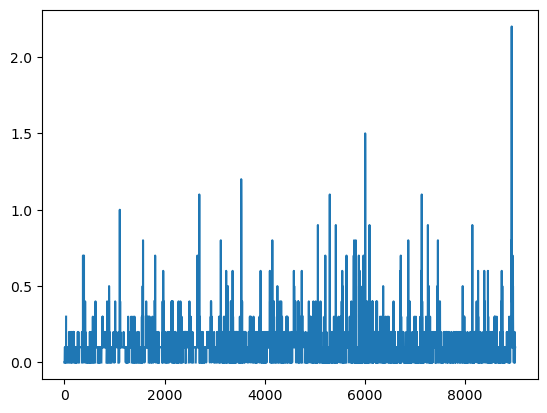

In [5]:
#check out the new plot
precip.HPCP.plot()

## Strings into Dates
Notice that the DATE column in our dataframe is not of type datetime. We can check this using the dtypes attribute for dataframes.

The object dtype means that (most likely) all values in that column are strings. We can convert strings to `datetime` objects using the `to_datetime()` pandas function:

- `pd.to_datetime()` input: a `pd.Series` with strings that can be converted to dates
- `pd.to_datetime()` output: a `pd.Series` with the strings converted to datetime objects


In [16]:
# check the dtypes of all columns
precip.dtypes

#change the string to Datetime
precip.DATE = pd.to_datetime(precip.DATE)

#recheck the types
precip.dtypes


STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object

<AxesSubplot:xlabel='DATE'>

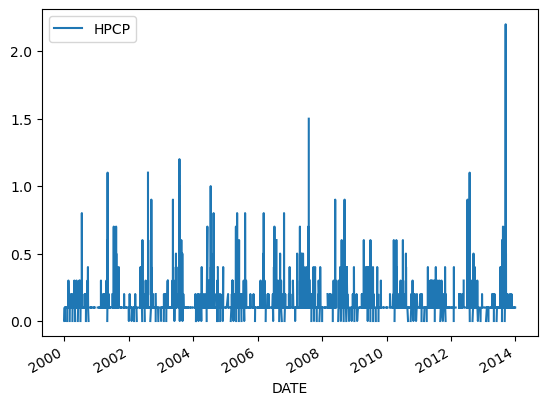

In [17]:
precip.plot(x = "DATE", y ="HPCP")

## Timestamp index
At its core, we have time series data if our data frame is indexed by moments in time. Using our DATE column as the index will allows us to do many operations with respect to time, including subsetting and resampling.

Updating the index of a dataframe is simple, we use the set_index() method. It’s general syntax is

```
df = df.set_index(new_index)
```

where `new_index` is:

- the name of the column (string) we want to set as index, or
- if our new index is not a column in the dataframe, an array or pd.Series of the same length as our data frame (we need one index per row!).
Notice that `set_index` does not modify the data frame in place.

Example

In our precipitation data this is:

<AxesSubplot:xlabel='DATE'>

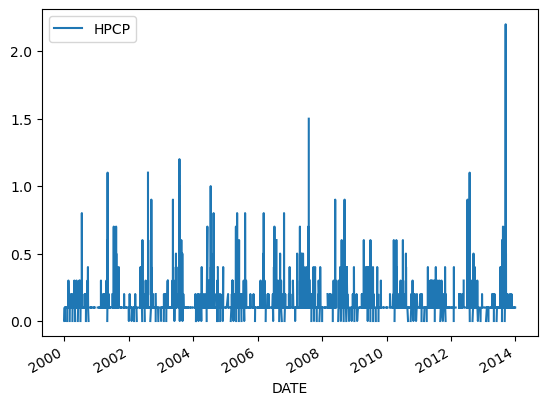

In [18]:
# set DATE coumn as index
precip = precip.set_index('DATE')

# check new index
precip.head()

#Simplify our plottong
precip.plot()

In [19]:
# select data from a given month and year
# use loc['year-month']
#precip.loc['2013-09']

# select data from a given year
# use loc['year']
precip.loc['2013']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2013-01-10 02:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-01-13 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-01-26 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
2013-01-28 23:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<AxesSubplot:xlabel='DATE'>

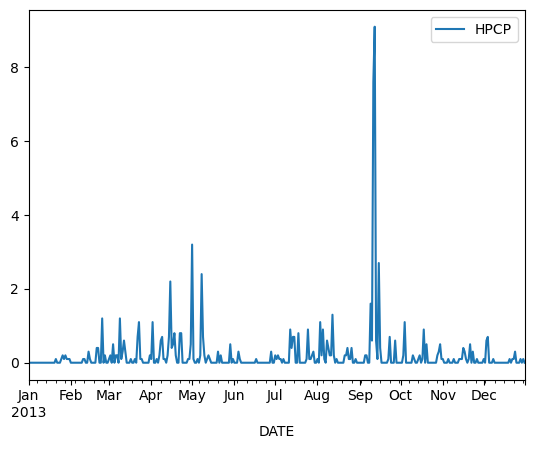

In [22]:
# resample 2013 hourly data to daily frequency
# nothing happens
precip.loc['2013'].resample('D')
# total daily precipitation in 2013
daily_precip_2013 = precip.loc['2013'].resample('D').sum()

<AxesSubplot:title={'center':'Precipitation in Boulder, CO during 2013'}, xlabel='date', ylabel='daily precipitation (in)'>

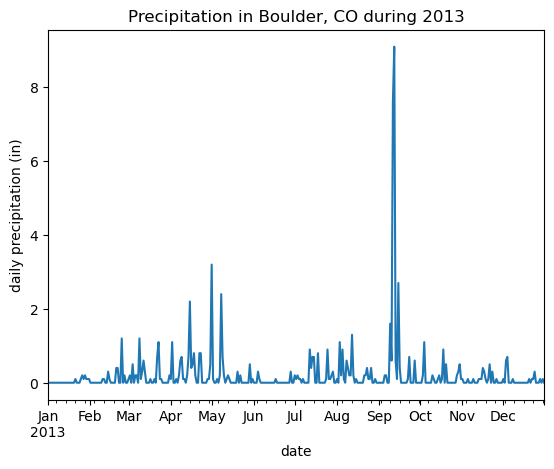

In [23]:
daily_precip_2013 = daily_precip_2013.rename(columns={'HPCP':'daily_precipitation'})

daily_precip_2013.plot(ylabel='daily precipitation (in)', 
                       xlabel='date',
                       title='Precipitation in Boulder, CO during 2013',
                       legend=False)